# Nguyễn Mạnh Khang
# 223030635

# Chapter 8 - Tree-based Methods

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


### 8.1.1 Regression Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [2]:
import os

os.chdir(r"C:\Users\HP\Documents\Zalo Received Files\Thuc Hanh Hoc May Code_Python")

In [3]:
df = pd.read_csv('Data/Hitters.csv').dropna()

In [4]:
y = df.Salary
X=df[['Years', 'Hits']]

In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y_pred = regr.predict(X)

def evaluate(y, y_pred, dataset_name="Dataset"):
    mse  = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y, y_pred)
    r2   = r2_score(y, y_pred)

    print(f"--- {dataset_name} ---")
    print(f"R² score : {r2:.4f}")
    print(f"MSE      : {mse:.4f}")
    print(f"RMSE     : {rmse:.4f}")
    print(f"MAE      : {mae:.4f}\n")

evaluate(y, y_pred, "Score on data")


--- Score on data ---
R² score : 0.4367
MSE      : 114209.1876
RMSE     : 337.9485
MAE      : 226.3411



### Figure 8.1

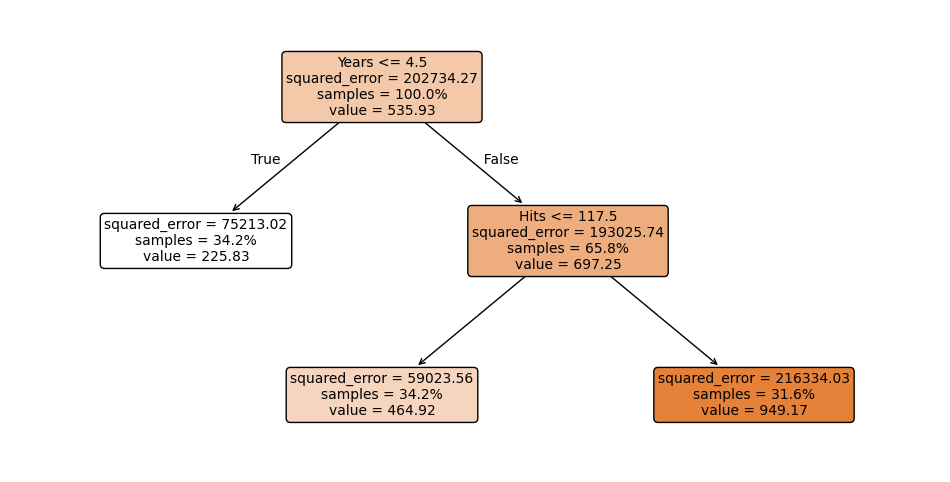

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
tree.plot_tree(
    regr,
    feature_names=["Years", "Hits"],  
    filled=True,                  
    rounded=True,                 
    impurity=True,                 
    proportion=True,             
    precision=2,                    
    fontsize=10               
)
plt.show()


###  Figure 8.2

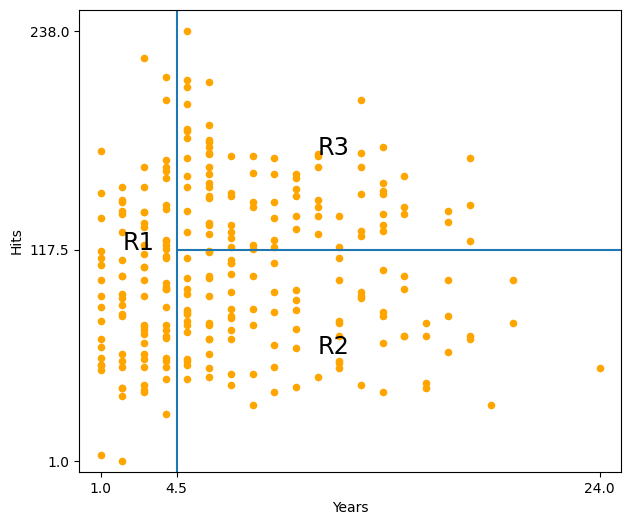

In [8]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

### Pruning
This is currently not supported in scikit-learn. See first point under 'disadvantages of decision trees in the <A href='http://scikit-learn.github.io/dev/modules/tree.html#'>documentation</A>. Implementation has been <A href='https://github.com/scikit-learn/scikit-learn/pull/941'>discussed</A> but Random Forests have better predictive qualities than a single pruned tree anyway if I understand correctly.
    

### 8.1.2 Classification Trees

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [9]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()

In [10]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [11]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [12]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,3
,random_state,None
,max_leaf_nodes,6
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
clf.score(X2,y2)

0.7609427609427609

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

y_pred = clf.predict(X2)

print("Accuracy:", accuracy_score(y2, y_pred))

print("\nClassification Report (Test):")
print(classification_report(y2, y_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y2, y_pred))

cv_scores = cross_val_score(clf, X2, y2, cv=5, scoring="accuracy")
print("\nCross-Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Accuracy: 0.7609427609427609

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       160
           1       0.80      0.64      0.71       137

    accuracy                           0.76       297
   macro avg       0.77      0.75      0.75       297
weighted avg       0.77      0.76      0.76       297


Confusion Matrix (Test):
[[138  22]
 [ 49  88]]

Cross-Validation Accuracy: [0.71666667 0.73333333 0.76271186 0.69491525 0.76271186]
Mean CV Accuracy: 0.7340677966101694


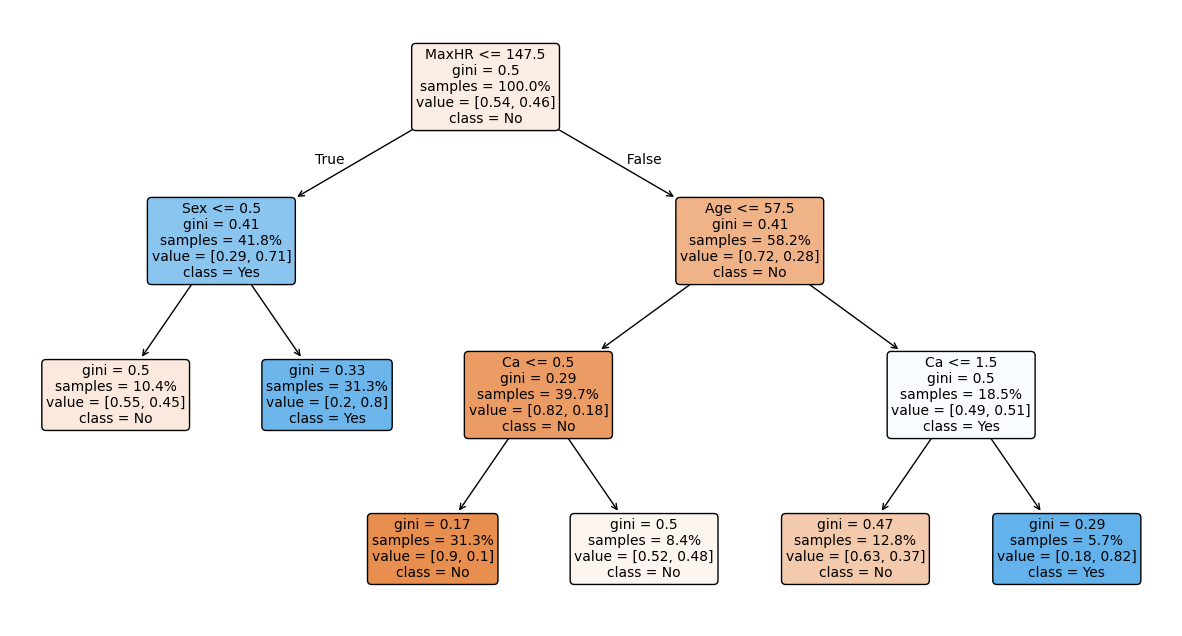

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,8)) 
tree.plot_tree(
    clf,
    feature_names=X2.columns,  
    class_names=['No', 'Yes'],   
    filled=True,                 
    rounded=True,             
    proportion=True,            
    precision=2,             
    fontsize=10,           
    impurity=True,    
    max_depth=3           
)
plt.show()


In [16]:
print("Criterion:", clf.criterion)

Criterion: gini


In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=None,
    max_leaf_nodes=6,
    max_features=3,
    random_state=0
)

clf_entropy.fit(X2, y2)

print("Criterion:", clf_entropy.criterion)


Criterion: entropy


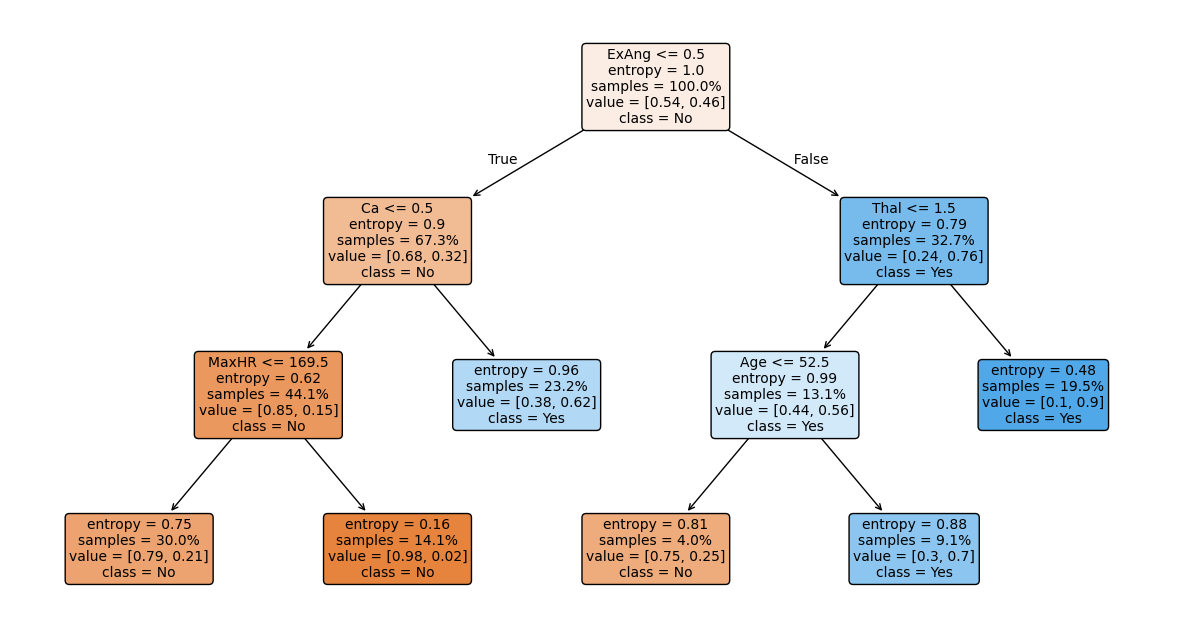

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,8)) 
tree.plot_tree(
    clf_entropy,
    feature_names=X2.columns,  
    class_names=['No', 'Yes'],   
    filled=True,                 
    rounded=True,             
    proportion=True,            
    precision=2,             
    fontsize=10,           
    impurity=True,    
    max_depth=3           
)
plt.show()


## Lab

### 8.3.1 Fitting Classification Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [19]:
df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)


In [20]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})


In [21]:
df3.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [22]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [23]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [25]:
y_train_pred = clf.predict(X_train)
y_test_pred  = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

cv_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print("\nCross-Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Train Accuracy: 0.905
Test Accuracy : 0.93

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       118
           1       0.99      0.84      0.91        82

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.93      0.93       200


Confusion Matrix (Test):
[[117   1]
 [ 13  69]]

Cross-Validation Accuracy: [0.8    0.75   0.75   0.6125 0.5875]
Mean CV Accuracy: 0.7


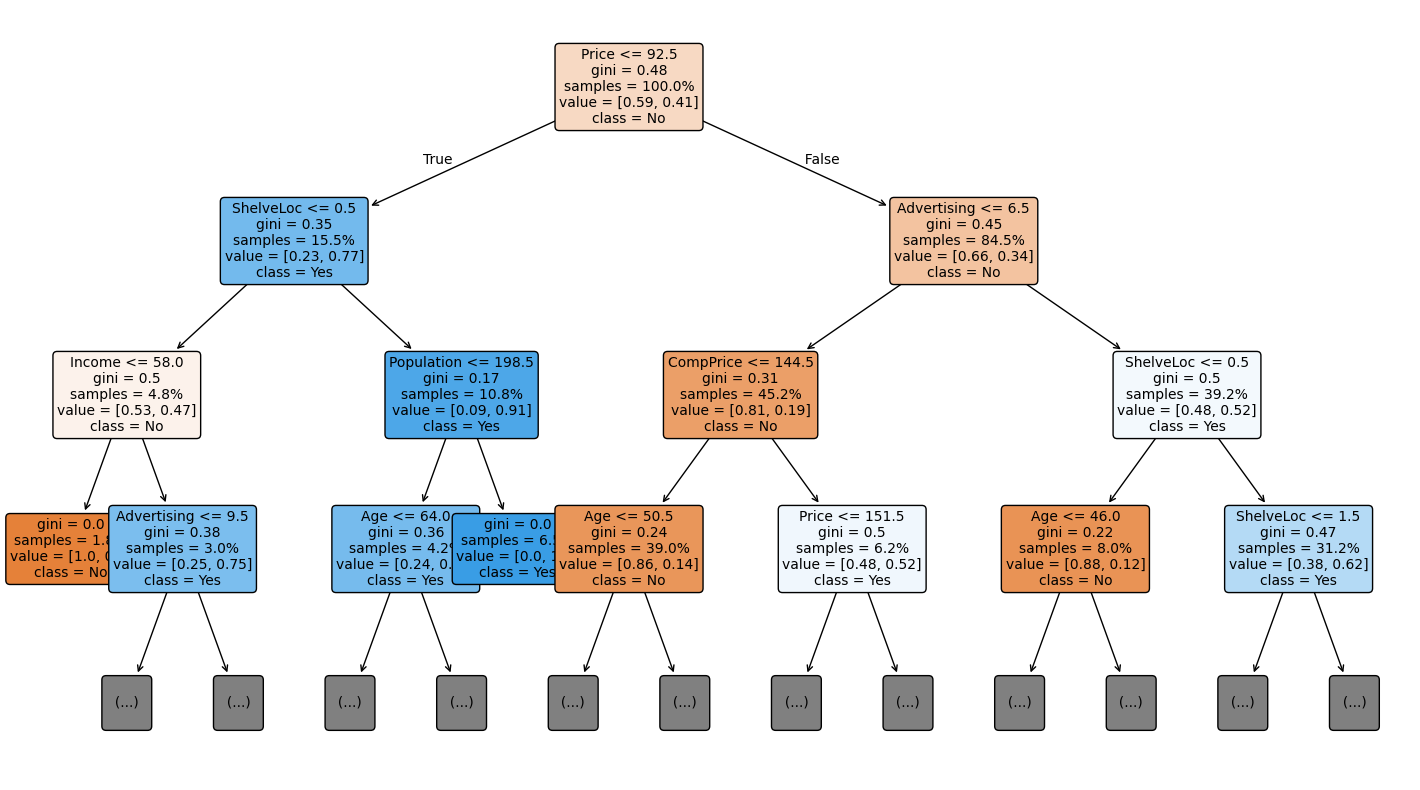

In [26]:
plt.figure(figsize=(18,10))
tree.plot_tree(
    clf,
    feature_names=X.columns,  
    class_names=['No', 'Yes'],
    filled=True,              
    rounded=True,           
    proportion=True,      
    impurity=True,         
    precision=2,          
    fontsize=10,      
    max_depth=3               
)
plt.show()


In [27]:
clf2 = DecisionTreeClassifier(criterion="entropy")
clf2.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


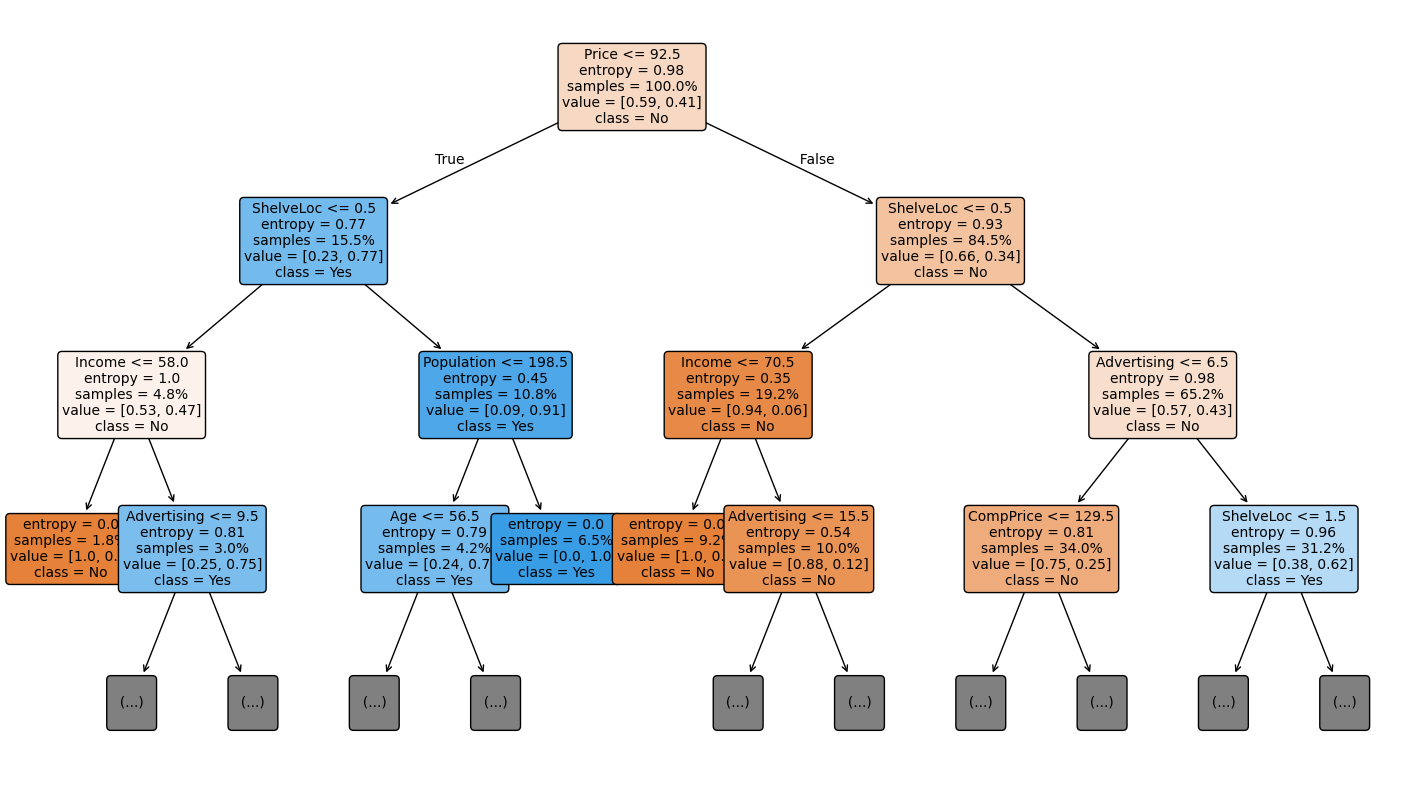

In [28]:
plt.figure(figsize=(18,10))
tree.plot_tree(
    clf2,
    feature_names=X.columns,  
    class_names=['No', 'Yes'],
    filled=True,              
    rounded=True,           
    proportion=True,      
    impurity=True,         
    precision=2,          
    fontsize=10,      
    max_depth=3               
)
plt.show()


In [29]:
clf3 = DecisionTreeClassifier(criterion="log_loss")
clf3.fit(X, y)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


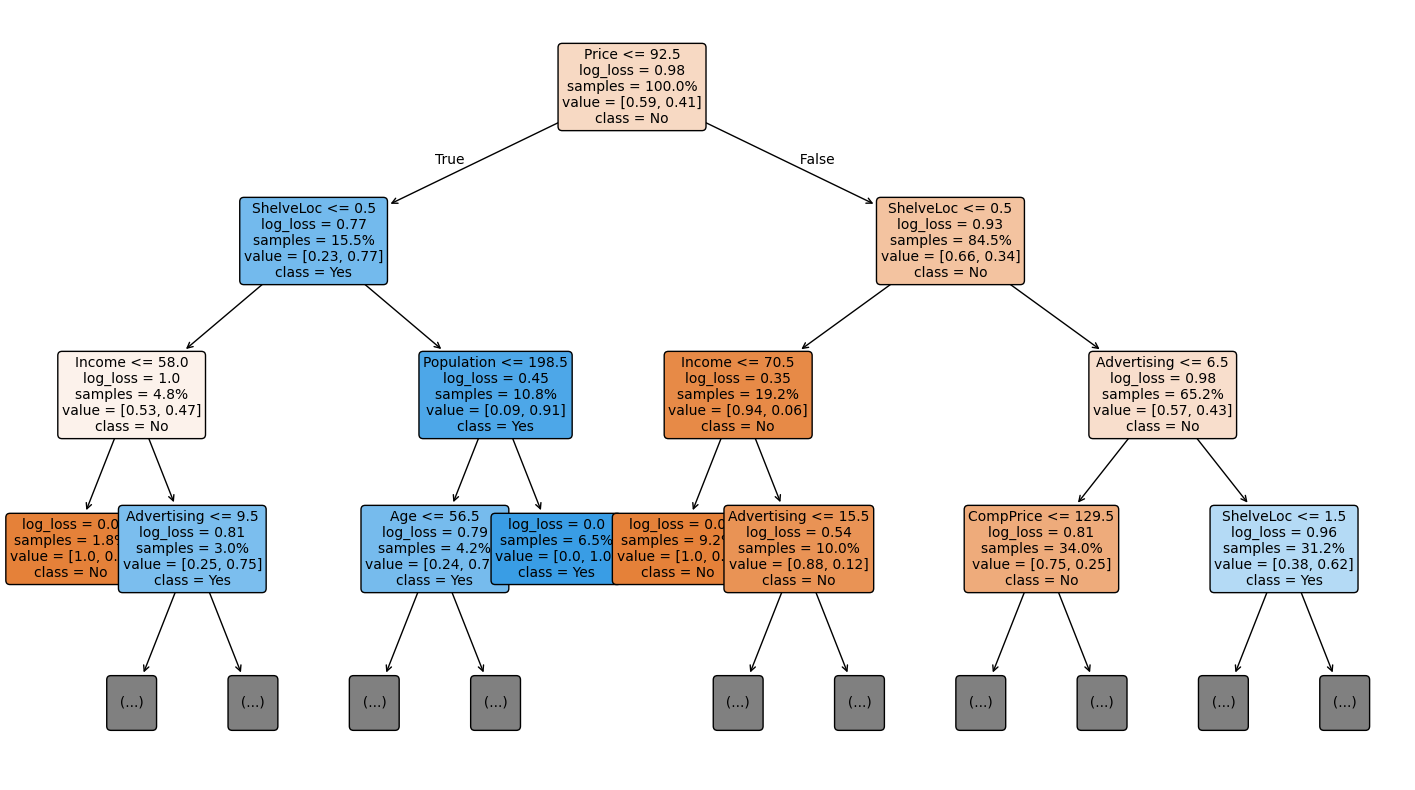

In [30]:
plt.figure(figsize=(18,10))
tree.plot_tree(
    clf3,
    feature_names=X.columns,  
    class_names=['No', 'Yes'],
    filled=True,              
    rounded=True,           
    proportion=True,      
    impurity=True,         
    precision=2,          
    fontsize=10,      
    max_depth=3               
)
plt.show()


In [31]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [32]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,99,32
Yes,19,50


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.72      0.61      0.66        82

    accuracy                           0.74       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.74      0.74       200



Pruning not implemented in scikit-learn.

### 8.3.2 Fitting Regression Trees

In R, I exported the dataset from package 'MASS' to a csv file.

In [34]:
boston_df = pd.read_csv('Data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [35]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [36]:
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

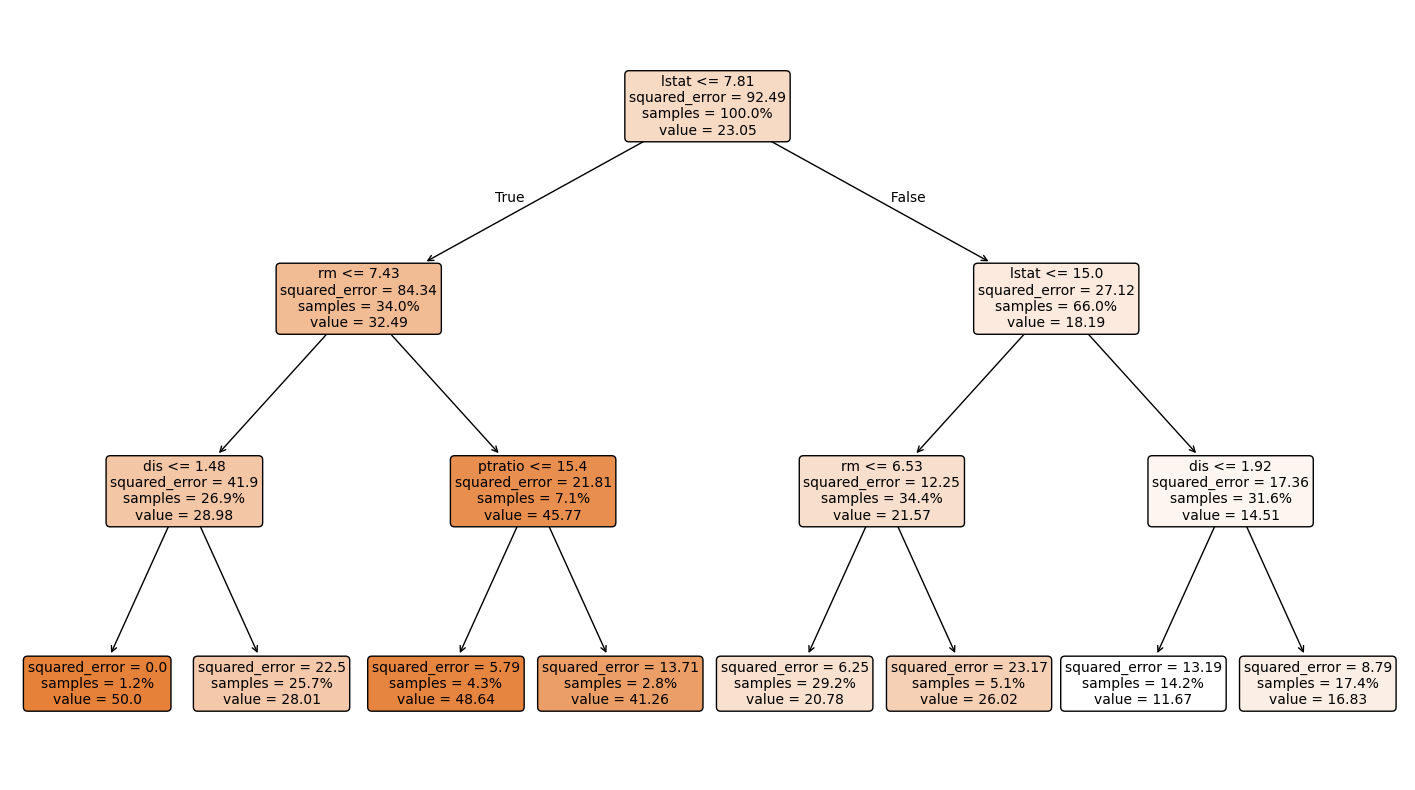

In [37]:
plt.figure(figsize=(18,10))
tree.plot_tree(
    regr2,
    feature_names=X.columns, 
    class_names=['No', 'Yes'], 
    filled=True,              
    rounded=True,         
    proportion=True,         
    impurity=True,            
    precision=2,            
    fontsize=10,            
    max_depth=3             
)
plt.show()


Text(0, 0.5, 'y_test')

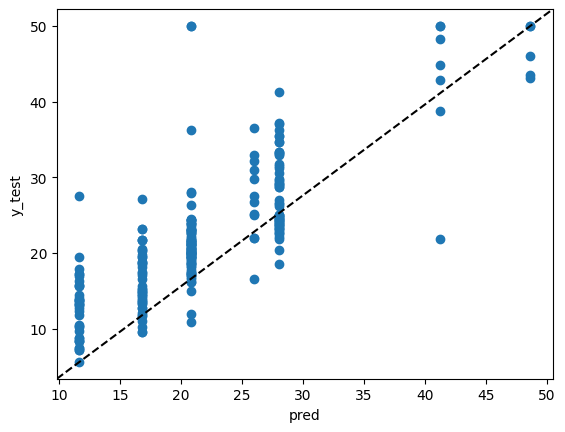

In [38]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [39]:
mean_squared_error(y_test, pred)

26.02323085009744

### 8.3.3 Bagging and Random Forests

In [40]:
X.shape

(506, 13)

In [41]:
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,13
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Text(0, 0.5, 'y_test')

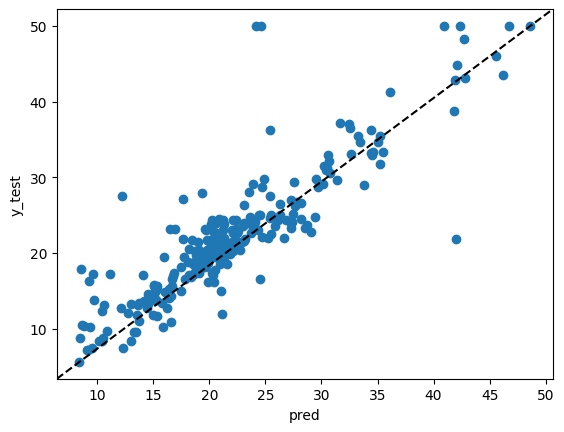

In [42]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [43]:
mean_squared_error(y_test, pred)

16.17512869960475

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = regr1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 16.17512869960475
Root Mean Squared Error (RMSE): 4.021831510593743
Mean Absolute Error (MAE): 2.4333162055335973
R-squared (R²): 0.7866506352833871


In [45]:
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = regr2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 15.82350045849802
Root Mean Squared Error (RMSE): 3.9778763754669426
Mean Absolute Error (MAE): 2.4516284584980235
R-squared (R²): 0.7912885991135217


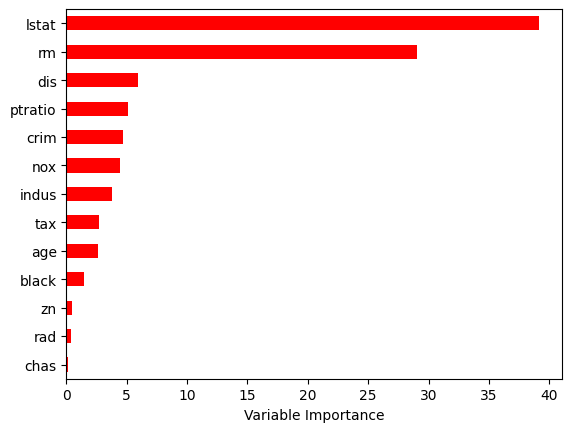

In [48]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### 8.3.4 Boosting

In [49]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.01
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


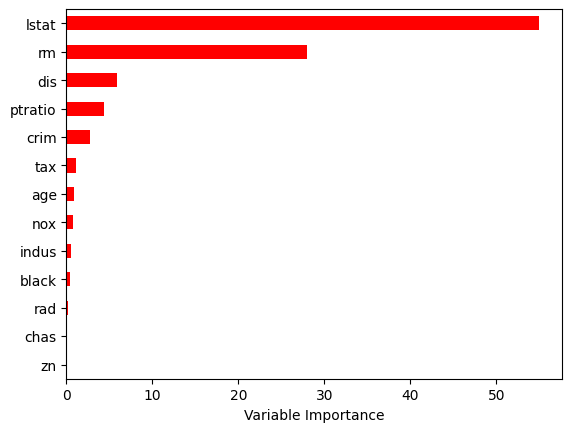

In [50]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:
mean_squared_error(y_test, regr.predict(X_test))

15.592155779633027

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = regr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 15.592155779633027
Root Mean Squared Error (RMSE): 3.948690387917623
Mean Absolute Error (MAE): 2.4534854742494745
R-squared (R²): 0.7943400270918117


# Chapter 9 - Support Vector Machines

In [170]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [171]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Set1)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    #print('Number of support vectors: ', svc.support_.size)

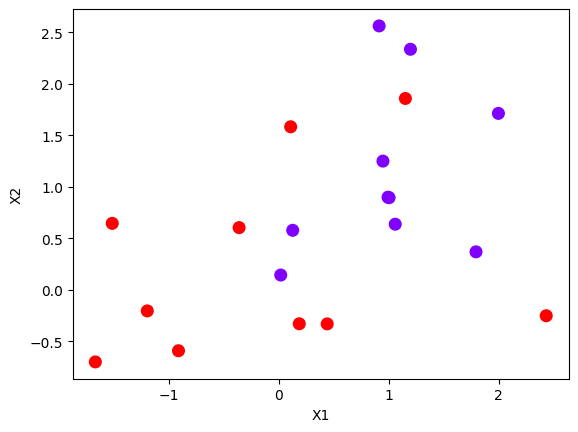

In [172]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.rainbow)
plt.xlabel('X1')
plt.ylabel('X2');

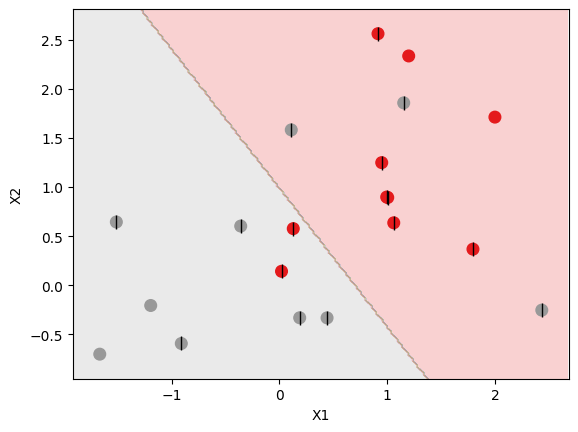

In [173]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 0.10, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

In [174]:
w=svc.coef_[0]
print(w)

[-0.49369513 -0.34895415]


In [175]:
b=svc.intercept_[0]
print(b)

0.34466232590493195


In [176]:

w = svc.coef_[0]
b = svc.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")


margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

print("Chỉ số vector hỗ trợ:", svc.support_)
print("Số lượng vector hỗ trợ:", svc.support_.size)
print("Các vector hỗ trợ:\n", svc.support_vectors_)


Phương trình siêu phẳng: -0.494*X1 + -0.349*X2 + 0.345 = 0
Khoảng cách lề (mỗi phía): 1.654070452519119
Chỉ số vector hỗ trợ: [10 11 13 14 15 16 17 19  0  1  2  3  4  6  8  9]
Số lượng vector hỗ trợ: 16
Các vector hỗ trợ:
 [[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-0.35882895  0.6034716 ]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


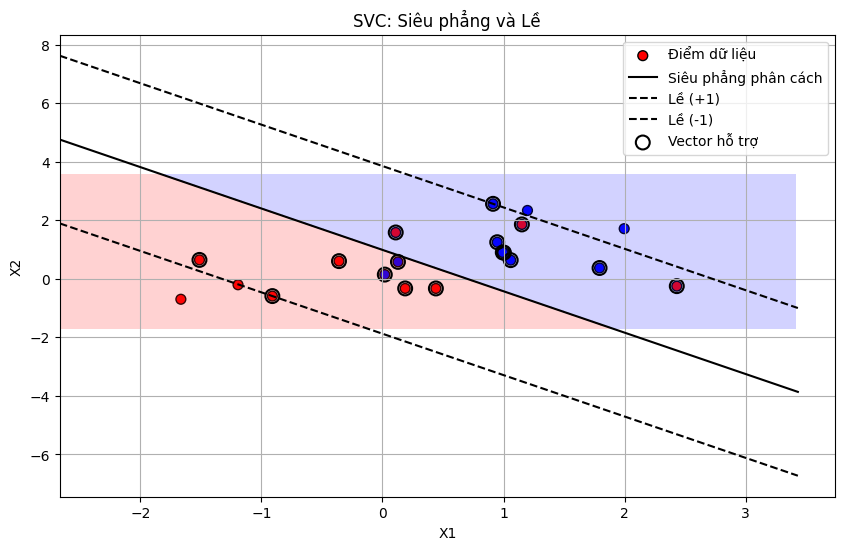

In [178]:
def plot_svc(svc, X, y):
    plt.figure(figsize=(10, 6))
    
    # Vẽ các điểm dữ liệu
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k', label='Điểm dữ liệu')
    
    # Tạo lưới để vẽ siêu phẳng
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Dự đoán trên lưới để vẽ vùng quyết định
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Vẽ vùng quyết định
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
    
    # Tính và vẽ siêu phẳng và lề
    x1 = np.linspace(x_min, x_max, 100)
    w0, w1 = w[0], w[1]
    
    # Siêu phẳng: w0*x1 + w1*x2 + b = 0 => x2 = -(w0*x1 + b)/w1
    decision_boundary = -(w0 * x1 + b) / w1
    
    # Lề: w0*x1 + w1*x2 + b = ±1 => x2 = -(w0*x1 + b ± 1)/w1
    margin_pos = -(w0 * x1 + b + 1) / w1  # Lề +1
    margin_neg = -(w0 * x1 + b - 1) / w1  # Lề -1
    
    # Vẽ siêu phẳng và lề
    plt.plot(x1, decision_boundary, 'k-', label='Siêu phẳng phân cách')
    plt.plot(x1, margin_pos, 'k--', label='Lề (+1)')
    plt.plot(x1, margin_neg, 'k--', label='Lề (-1)')
    
    # Vẽ vector hỗ trợ
    plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, 
                facecolors='none', edgecolors='k', linewidths=1.5, label='Vector hỗ trợ')
    
    # Định dạng đồ thị
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('SVC: Siêu phẳng và Lề')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gọi hàm vẽ
plot_svc(svc, X, y)

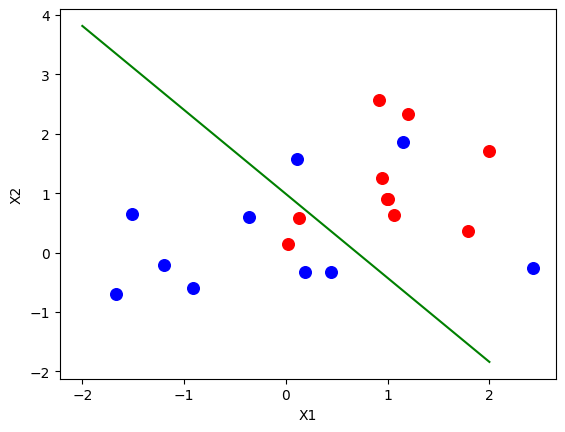

In [109]:
#  w1x1+w2x2+b=0
xx=np.linspace(-2,2,50)
yy=-(w[0]*xx+b)/w[1]
plt.plot(xx,yy,c='green')

#plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.rainbow )
id1=y==-1
id2=y==1
plt.scatter(X[id1,0], X[id1,1], s=70, c='red')
plt.scatter(X[id2,0], X[id2,1], s=70, c='blue')


plt.xlabel('X1')
plt.ylabel('X2');

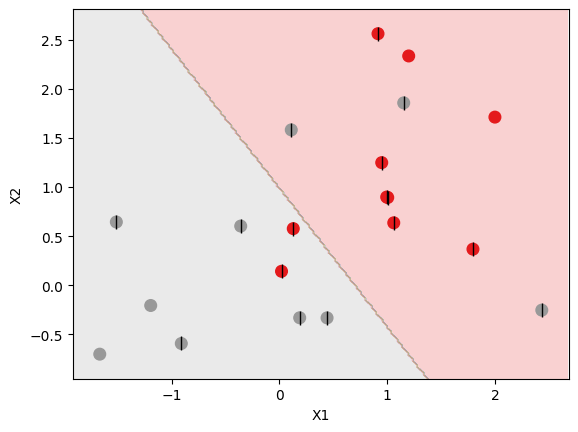

In [110]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [111]:

w = svc2.coef_[0]
b = svc2.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")


margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

print("Chỉ số vector hỗ trợ:", svc2.support_)
print("Số lượng vector hỗ trợ:", svc2.support_.size)
print("Các vector hỗ trợ:\n", svc2.support_vectors_)


Phương trình siêu phẳng: -0.494*X1 + -0.349*X2 + 0.345 = 0
Khoảng cách lề (mỗi phía): 1.654070452519119
Chỉ số vector hỗ trợ: [10 11 13 14 15 16 17 19  0  1  2  3  4  6  8  9]
Số lượng vector hỗ trợ: 16
Các vector hỗ trợ:
 [[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-0.35882895  0.6034716 ]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


In [112]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
#clf.cv_results_

,estimator,SVC(kernel='linear')
,param_grid,"[{'C': [0.001, 0.01, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,C,0.001


In [113]:
clf.best_params_

{'C': 0.001}

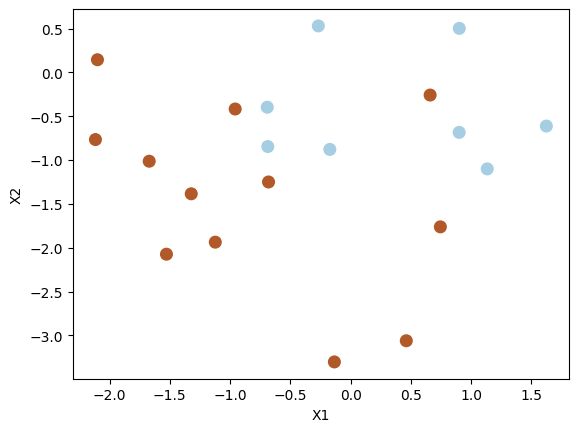

In [114]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [115]:
best_svc = clf.best_estimator_

In [116]:
# Trích thông tin mô hình
w = best_svc.coef_[0]
b = best_svc.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")

# Margin
margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

# Support vectors
print("Chỉ số vector hỗ trợ:", best_svc.support_)
print("Số lượng vector hỗ trợ:", best_svc.support_.size)
print("Các vector hỗ trợ:\n", best_svc.support_vectors_)


Phương trình siêu phẳng: -0.011*X1 + -0.009*X2 + 0.006 = 0
Khoảng cách lề (mỗi phía): 68.67928697162795
Chỉ số vector hỗ trợ: [10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9]
Số lượng vector hỗ trợ: 20
Các vector hỗ trợ:
 [[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


In [117]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

,-1,1
-1,2,6
1,0,12


In [118]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,2,6
1,0,12


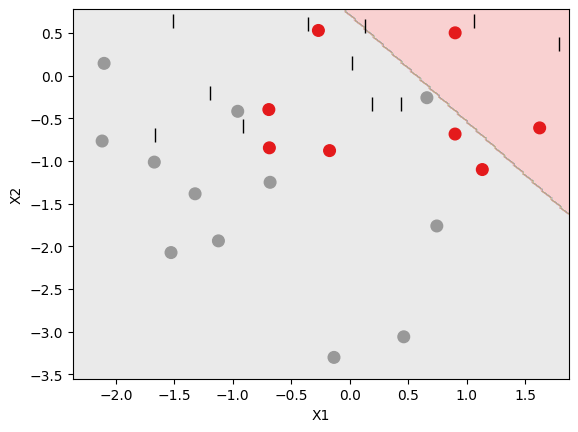

In [119]:
plot_svc(svc3, X_test, y_test)

In [120]:
# Trích thông tin mô hình
w = svc3.coef_[0]
b = svc3.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")

# Margin
margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

# Support vectors
print("Chỉ số vector hỗ trợ:", svc3.support_)
print("Số lượng vector hỗ trợ:", svc3.support_.size)
print("Các vector hỗ trợ:\n", svc3.support_vectors_)


Phương trình siêu phẳng: -0.011*X1 + -0.009*X2 + 0.006 = 0
Khoảng cách lề (mỗi phía): 68.67928697162795
Chỉ số vector hỗ trợ: [10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9]
Số lượng vector hỗ trợ: 20
Các vector hỗ trợ:
 [[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


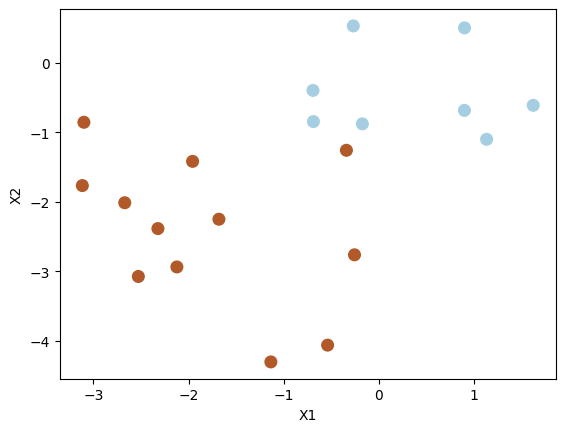

In [121]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [122]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

,C,10.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


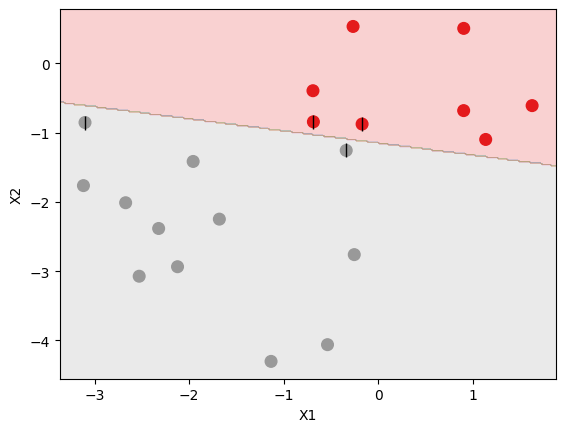

In [123]:
plot_svc(svc4, X_test, y_test)

In [124]:
# Trích thông tin mô hình
w = svc4.coef_[0]
b = svc4.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")

# Margin
margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

# Support vectors
print("Chỉ số vector hỗ trợ:", svc4.support_)
print("Số lượng vector hỗ trợ:", svc4.support_.size)
print("Các vector hỗ trợ:\n", svc4.support_vectors_)


Phương trình siêu phẳng: -0.715*X1 + -4.095*X2 + -4.718 = 0
Khoảng cách lề (mỗi phía): 0.24055162513785808
Chỉ số vector hỗ trợ: [ 8 16 10 19]
Số lượng vector hỗ trợ: 4
Các vector hỗ trợ:
 [[-0.17242821 -0.87785842]
 [-0.6871727  -0.84520564]
 [-3.10061918 -0.85527629]
 [-0.34019782 -1.25795584]]


In [125]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


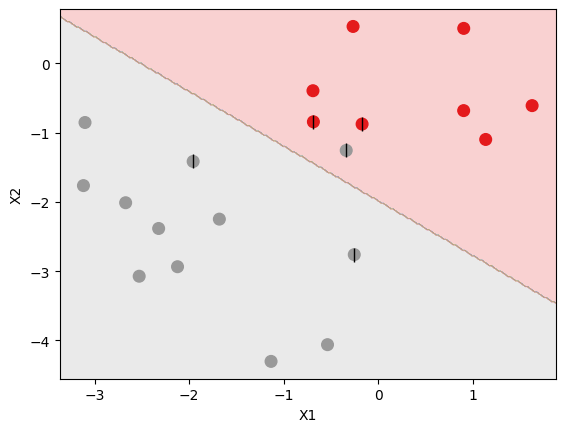

In [126]:
plot_svc(svc5, X_test, y_test)

In [127]:
# Trích thông tin mô hình
w = svc5.coef_[0]
b = svc5.intercept_[0]

print(f"Phương trình siêu phẳng: {w[0]:.3f}*X1 + {w[1]:.3f}*X2 + {b:.3f} = 0")

# Margin
margin = 1 / np.linalg.norm(w)
print("Khoảng cách lề (mỗi phía):", margin)

# Support vectors
print("Chỉ số vector hỗ trợ:", svc5.support_)
print("Số lượng vector hỗ trợ:", svc5.support_.size)
print("Các vector hỗ trợ:\n", svc5.support_vectors_)


Phương trình siêu phẳng: -0.810*X1 + -1.026*X2 + -2.041 = 0
Khoảng cách lề (mỗi phía): 0.7646840751607058
Chỉ số vector hỗ trợ: [ 8 16  3  9 19]
Số lượng vector hỗ trợ: 5
Các vector hỗ trợ:
 [[-0.17242821 -0.87785842]
 [-0.6871727  -0.84520564]
 [-0.25518824 -2.7612069 ]
 [-1.95778625 -1.41718479]
 [-0.34019782 -1.25795584]]


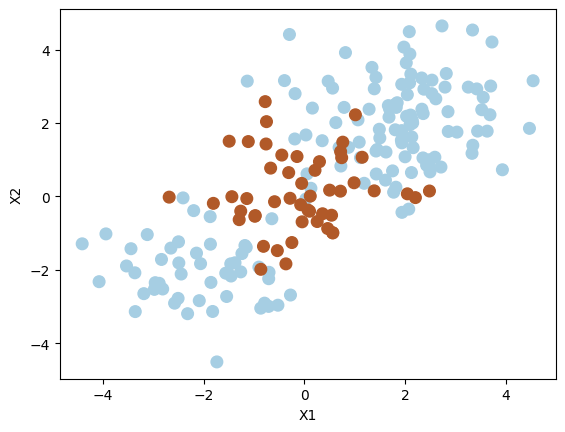

In [128]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [129]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [130]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

,C,100
,kernel,'rbf'
,degree,3
,gamma,1.0
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


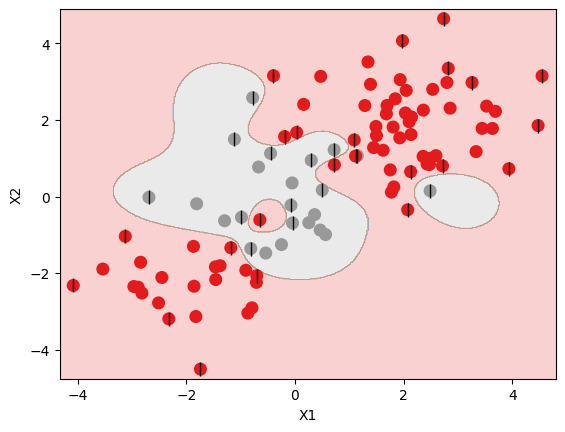

In [131]:
plot_svc(svm2, X_train, y_train)

### 9.6.2 Support Vector Machine 

In [132]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"[{'C': [0.01, 0.1, ...], 'gamma': [0.5, 1, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,C,10


In [133]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [134]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[66,  7],
       [ 6, 21]])

In [135]:
clf.best_estimator_.score(X_test, y_test)

0.87

### 9.6.3 ROC Curves

In [136]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,2
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [137]:
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,50
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


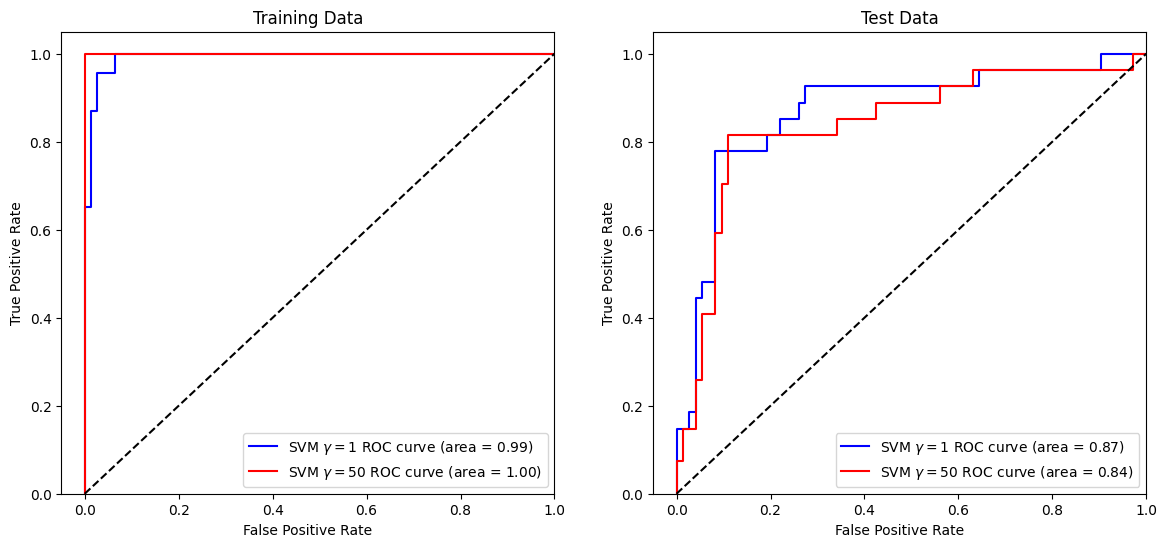

In [138]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

### 9.6.4 SVM with Multiple Classes

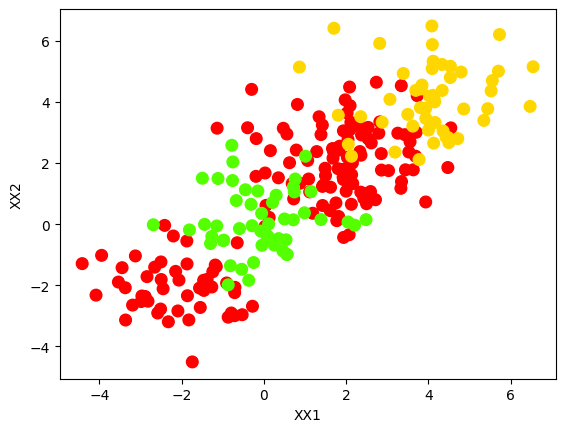

In [139]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [140]:
svm5 = SVC(C=1, kernel='rbf')
#svm5 = SVC(C=1, kernel='linear')
svm5.fit(XX, yy)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


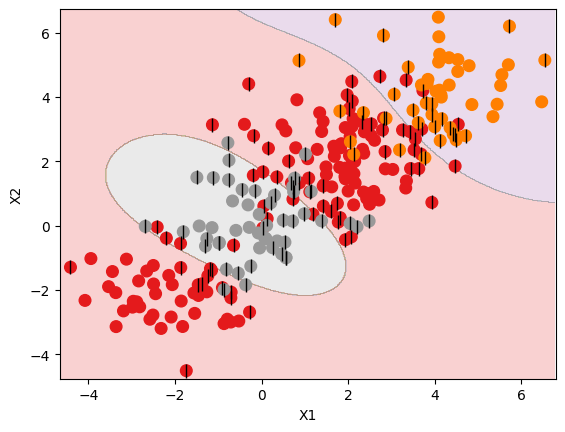

In [141]:
plot_svc(svm5, XX, yy)

### 9.6.5 Application to Gene Expression Data

In [142]:
X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [143]:
pd.Series(y_train).value_counts(sort=False)

2    23
4    20
3    12
1     8
Name: count, dtype: int64

In [144]:
pd.Series(y_test).value_counts(sort=False)

3    6
2    6
4    5
1    3
Name: count, dtype: int64

In [145]:
svc = SVC(kernel='linear')

In [146]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [147]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20
